## Part 2

A range of modern lighting and display technologies relies on colour conversion layers (CCLs), which enable the efficient conversion of light from shorter to longer wavelengths.

The newly developed optical material for CCL has been studied through spectroscopic analysis. The material was a transparent and chemically stable polyvinylcarbazole (PVK) film doped with two fluorescent dyes, BV440 and Atto505. The doping concentration for each dye was kept relatively low, less than 1% by weight. Additionally, both dyes were characterized through absorption and photoluminescence spectroscopies conducted under steady-state conditions. No phosphorescence or sample degradation effects were observed during the measurements.

The spectroscopic data are provided to you as ASCII files with space-separation between numbers.  Data set includes:

* Separately measured [absorption spectrum of BV440](Abs-BV440) (first column – wavelength (nm), second - optical density (OD))
* Separately measured [absorption spectrum of Atto505](Abs-Atto505) (first column - wavelength, second - OD)
* Separately measured [fluorescence spectrum of BV440](Fluorescence-BV440) (first column - wavelength, second – photon counts in arb.u.)
* Separately measured [fluorescence spectrum of Atto505](Fluorescence-Atto505) (first column - wavelength, second – photon counts in arb.u.)
* [Transient absorption spectrum](TA_2D-DATA.mx3) of the studied material (BV440 and Atto505 dopped PVK) after excitation at 370nm (2D matrix; the first column contains pump-probe delay times (ps) and the first row contains probe wavelengths; matrix elements show the change in transmission dT/T at the corresponding time/wavelength)

Your task is to analyse the experimental dataset and present a report addressing the following questions:

1. Identify excited states involved in the photochemistry and spectroscopy of the material. Propose a Jablonski diagram showing key processes happening in the material. When possible, specify the energies of excited states
2. Discuss and interpret cross-sections through transient absorption spectrum at (at least) two representative times and two representative wavelengths
3. Analyse the dynamics of the excited states and extract the timescale(s) of the dynamics using additional information provided by SVD or global fitting. Relate the identified timescales to the relevant dynamical processes on the Jablonski diagram proposed above.
4. Where possible, identify the vibrational modes of BV440 and Atto505 (use multiple approaches if you can). Assign the observed vibrational coherences (if any) to the electronic states.

Please support your analysis with the figures and references to the relevant theoretical background.

In [3]:
#import serial
#import serial.tools.list_ports
import time
%pylab inline
#from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


Max Absorbance is at wavlength 503.13 nm


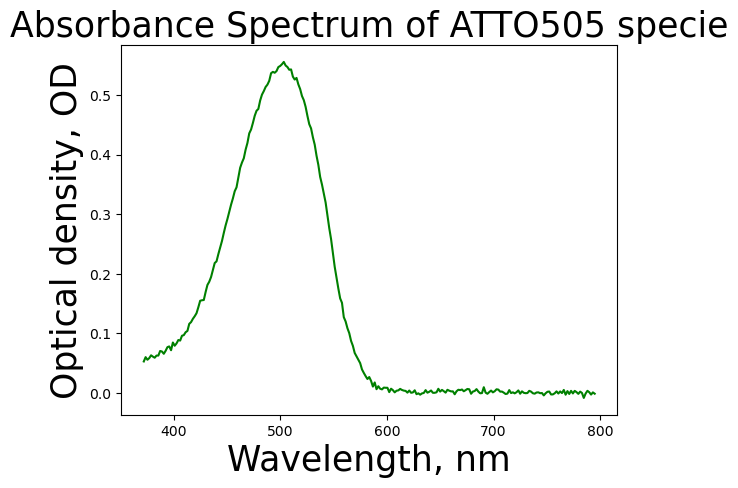

In [4]:
file1 = open("Abs-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs1 = all_abs
combine_abs = all_abs

plot(all_wl,all_abs1,color = 'green')
xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of ATTO505 specie', fontsize = 25)
max(all_abs1)
a = all_abs1.index(max(all_abs1))
print('Max Absorbance is at wavlength '+str(round(all_wl[a],2))+ ' nm')

Max Absorbance is at wavlength 451.93 nm


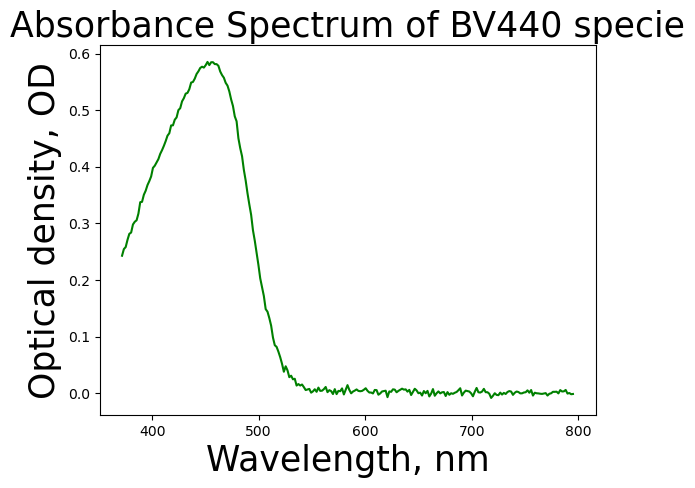

In [5]:
file1 = open("Abs-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs2 = all_abs
#combine_abs = all_abs

plot(all_wl,all_abs2,color = 'green')
xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440 specie', fontsize = 25)
max(all_abs2)
a = all_abs2.index(max(all_abs2))
print('Max Absorbance is at wavlength '+str(round(all_wl[a],2))+ ' nm')

NameError: name 'combine_abs_a' is not defined

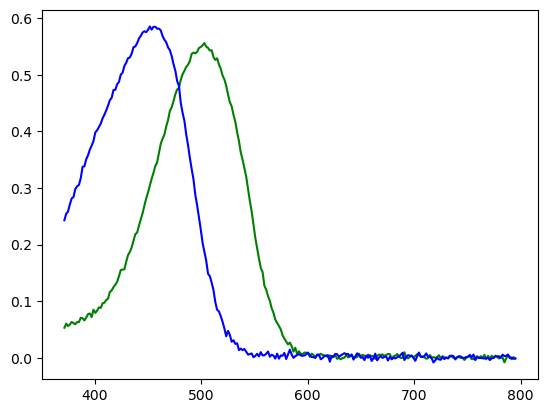

In [6]:
plot(all_wl,all_abs1,color = 'green')
plot(all_wl,all_abs2,color = 'blue')
plot(all_wl,combine_abs_a, color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440, ATTO505 specie, and their mixture', fontsize = 20)

max(all_abs1)
a = all_abs1.index(max(all_abs1))
tx = 'Max Absorbance for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'green', linestyle ='--', label = tx)

max(all_abs2)
a = all_abs2.index(max(all_abs2))
tx = 'Max Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

max(combine_abs_a)
a = where(combine_abs_a== max(combine_abs_a))[0][0]
tx = 'Max Absorbance for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

legend()

In [ ]:
plot(all_wl,all_abs1,color = 'green')
plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Optical density, OD', fontsize = 25) 
title('Absorbance Spectrum of BV440, ATTO505 specie', fontsize = 20)

max(all_abs1)
a = all_abs1.index(max(all_abs1))
tx = 'Max Absorbance for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'green', linestyle ='--', label = tx)

max(all_abs2)
a = all_abs2.index(max(all_abs2))
tx = 'Max Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

#max(combine_abs_a)
#a = where(combine_abs_a== max(combine_abs_a))[0][0]
#tx = 'Max Absorbance for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
#axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

legend()

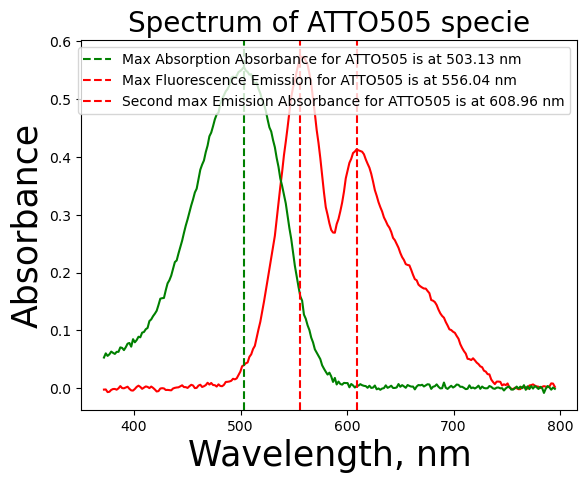

In [7]:
file1 = open("Fluorescence-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs3 = all_abs



file1 = open("Fluorescence-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs4 = all_abs
combine_abs_f = array(all_abs3)+array(all_abs4)


plot(all_wl,all_abs3,color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Absorbance', fontsize = 25) 
title('Spectrum of ATTO505 specie', fontsize = 20)


plot(all_wl,all_abs1,color = 'green')
#plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')


max(all_abs1)
aa = all_abs1.index(max(all_abs1))
tx = 'Max Absorption Absorbance for ATTO505 is at '+str(round(all_wl[aa],2))+ ' nm'
axvline(all_wl[aa], color = 'green', linestyle ='--', label = tx)






max(all_abs3)
a = all_abs3.index(max(all_abs3))
tx = 'Max Fluorescence Emission for ATTO505 is at '+str(round(all_wl[a],2))+ ' nm'
b = all_abs3.index(max(all_abs3[130:]))
tx2 = 'Second max Emission Absorbance for ATTO505 is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)
legend()

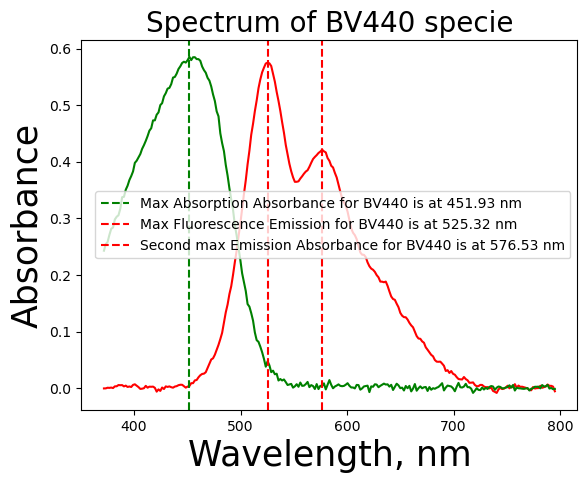

In [8]:
file1 = open("Fluorescence-Atto505", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs3 = all_abs



file1 = open("Fluorescence-BV440", "r")
file1.readline()
all_wl = []
all_abs = []
while True:
    oneline = file1.readline()
    if oneline == '':
        break
    all_wl.append(float(oneline.split()[0]))
    all_abs.append(float(oneline.split()[1]))
all_abs4 = all_abs
combine_abs_f = array(all_abs3)+array(all_abs4)


plot(all_wl,all_abs4,color = 'red')

xlabel('Wavelength, nm', fontsize = 25)
ylabel('Absorbance', fontsize = 25) 
title('Spectrum of BV440 specie', fontsize = 20)


plot(all_wl,all_abs2,color = 'green')
#plot(all_wl,all_abs2,color = 'blue')
#plot(all_wl,combine_abs_a, color = 'red')


max(all_abs2)
aa = all_abs2.index(max(all_abs2))
tx = 'Max Absorption Absorbance for BV440 is at '+str(round(all_wl[aa],2))+ ' nm'
axvline(all_wl[aa], color = 'green', linestyle ='--', label = tx)






max(all_abs4)
a = all_abs4.index(max(all_abs4))
tx = 'Max Fluorescence Emission for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
b = all_abs4.index(max(all_abs4[110:]))
tx2 = 'Second max Emission Absorbance for BV440 is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)
legend()

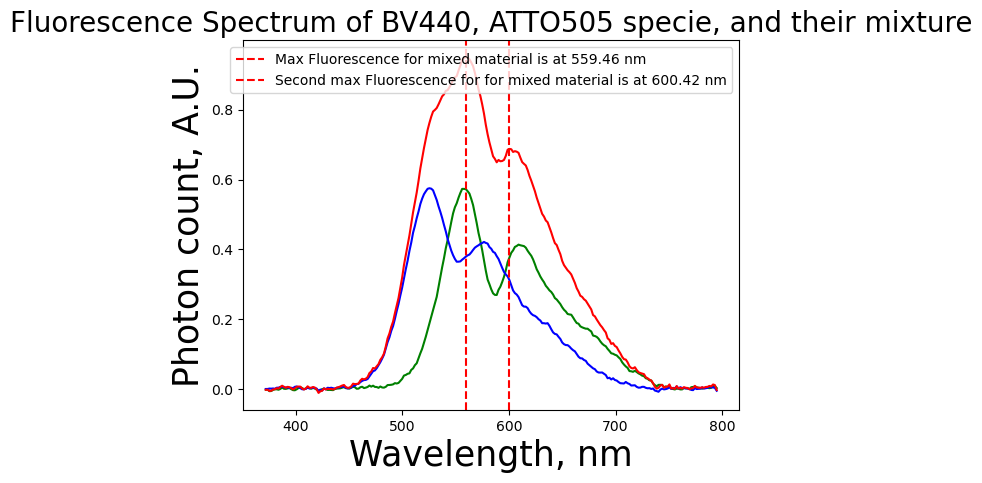

In [9]:
plot(all_wl,all_abs3,color = 'green')
plot(all_wl,all_abs4,color = 'blue')
plot(all_wl,combine_abs_f, color = 'red')


xlabel('Wavelength, nm', fontsize = 25)
ylabel('Photon count, A.U.', fontsize = 25) 
title('Fluorescence Spectrum of BV440, ATTO505 specie, and their mixture', fontsize = 20)
#axvline(all_wl[a], color = 'blue', linestyle ='--', label = tx)

max(combine_abs_f)
a = where(combine_abs_f== max(combine_abs_f))[0][0]
tx = 'Max Fluorescence for mixed material is at '+str(round(all_wl[a],2))+ ' nm'
#axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)

b = where(combine_abs_f== max(combine_abs_f[130:]))[0][0]
tx2 = 'Second max Fluorescence for for mixed material is at '+str(round(all_wl[b],2))+ ' nm'
axvline(all_wl[a], color = 'red', linestyle ='--', label = tx)
axvline(all_wl[b], color = 'red', linestyle ='--', label = tx2)

legend()

In [10]:
plot(all_wl,combine_abs_f+combine_abs_a, color = 'yellow')
plot(all_wl,all_abs1, color = 'red')
plot(all_wl,all_abs2, color = 'blue')
plot(all_wl,all_abs3, color = 'purple')
plot(all_wl,all_abs4, color = 'green')

NameError: name 'combine_abs_a' is not defined

In [11]:
file1 = open("TA_2D-DATA.mx3", "r")
all_row = []
while True:
    oneline = file1.readline()
    one_row = []
    if oneline == '':
        break
    onerow = oneline.split()
    for item in onerow:
        one_row.append(float(item))        
    all_row.append(one_row)
    
#print(len(all_row))

column = array(all_row)[:, [0]].tolist()
wavelength = all_row[:][0]
len(all_row[1])
del(wavelength[0])
del(column[0])
del(all_row[0])
i=0
while i<len(all_row):
    del(all_row[i][0])
    i=i+1

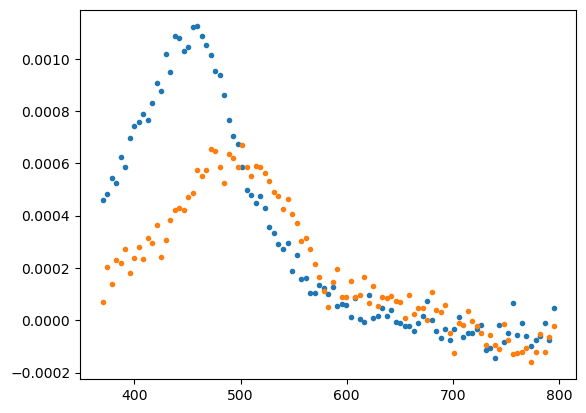

In [12]:
plot(wavelength,all_row[850],linestyle = '', marker = '.')
plot(wavelength,all_row[2000],linestyle = '', marker = '.')

In [13]:
column[875]

[0.125]

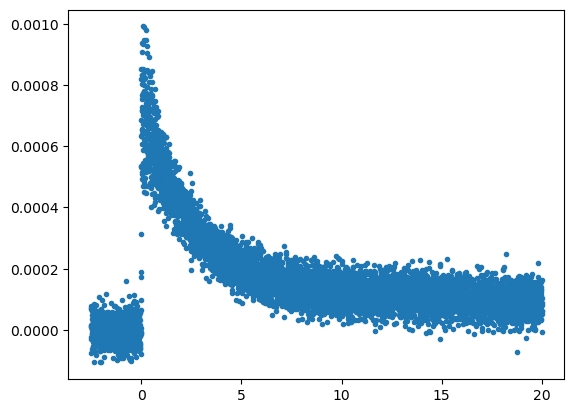

In [14]:
time = array(all_row)[:,10]
ti = time.tolist()
plot(column,ti,linestyle = '', marker = '.')

In [15]:
len(x)

NameError: name 'x' is not defined

In [16]:
len(all_row[0])

101

In [22]:
np.amax(all_row)

0.00130881625733123

In [17]:
x,y = meshgrid(wavelength,column)
levels = linspace(-0.0004,0.0014,1000)

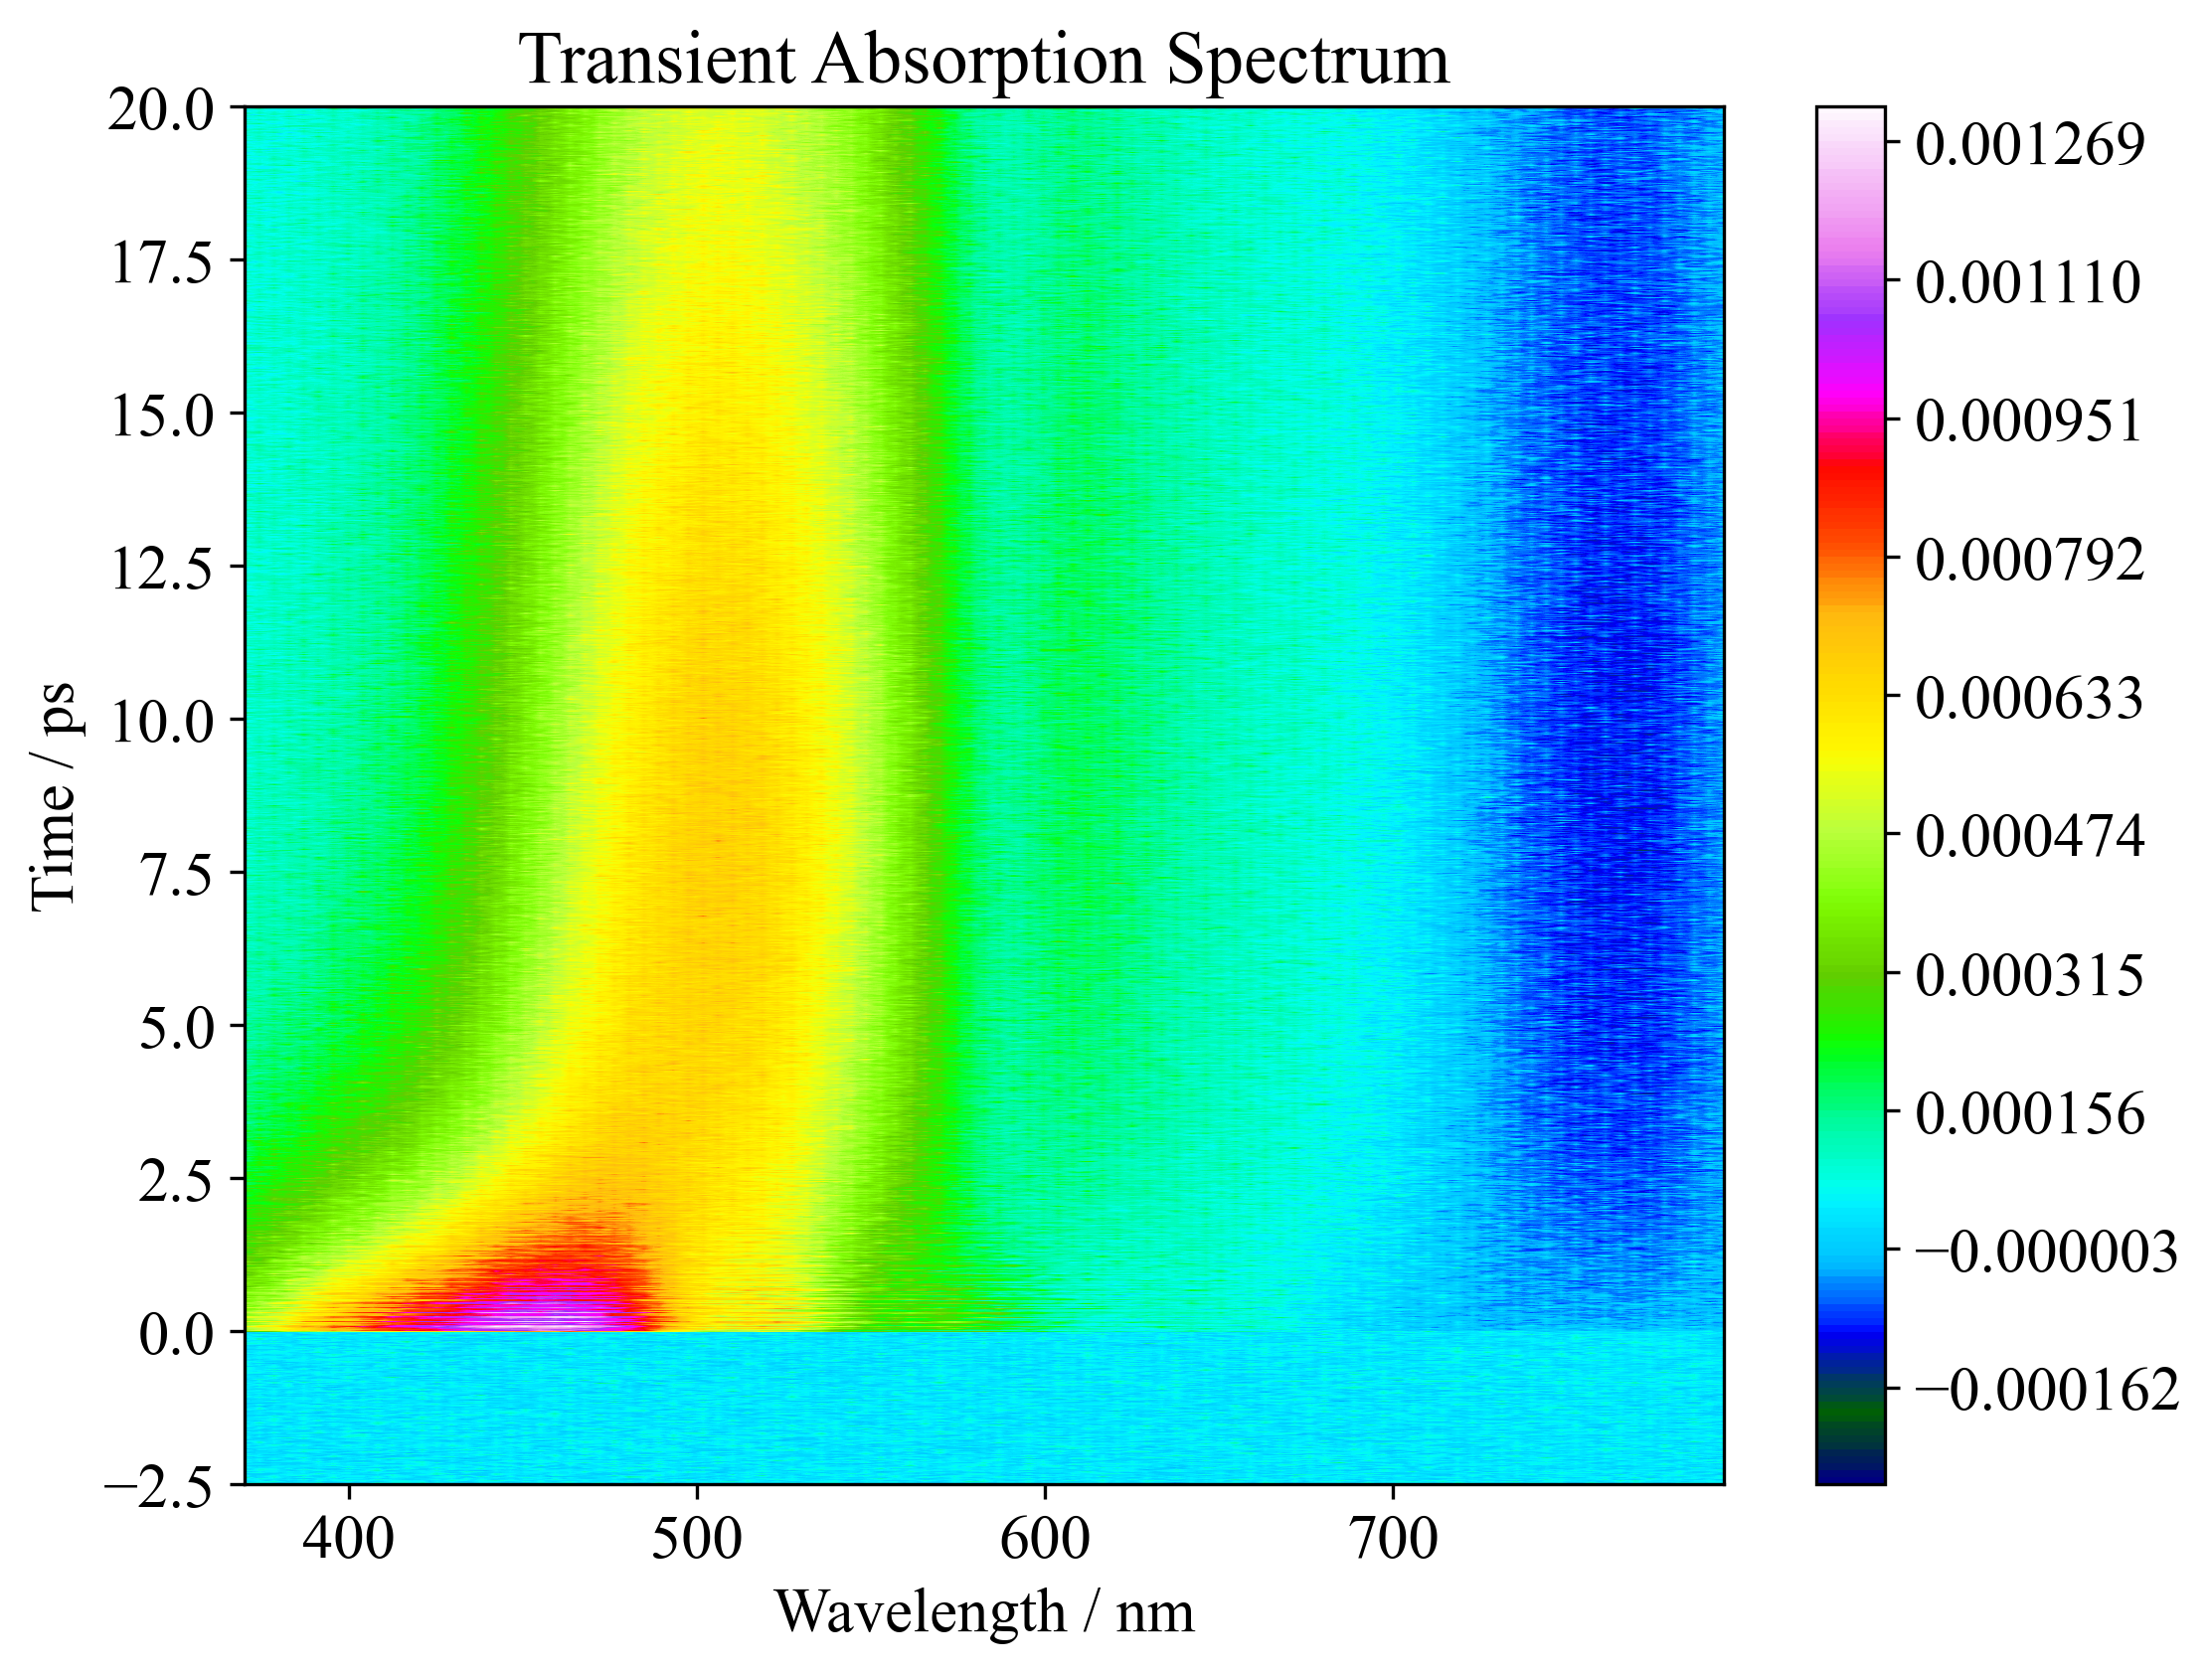

In [27]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})



cmap = plt.get_cmap('gist_ncar')
set_cmap(cmap)
levels = linspace(np.amin(all_row),np.amax(all_row),200)
contourf(x,y,all_row,levels=levels)
colorbar()


# Add styles for the graph
plt.title('Transient Absorption Spectrum')

xlabel('Wavelength / nm')
ylabel('Time / ps')



#plt.xlim([1.5,3])
#plt.ylim()

#plt.grid(True, which='both')
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')

#plt.legend()
plt.show()

Text(0.5, 1.0, 'dT/T versus time for wavelngth 450.75 nm')

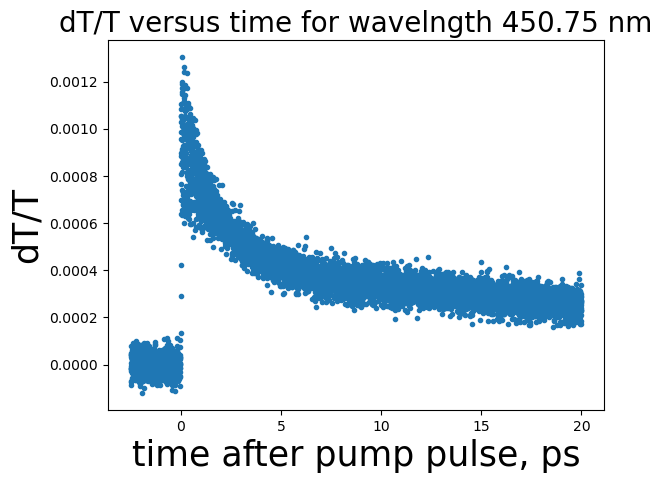

In [19]:
#wavelength[19]
plot(column,array(all_row)[:,19], linestyle ='', marker = '.')
#wavelength = 450.75 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 450.75 nm', fontsize = 20)

(0.0, 1.0)

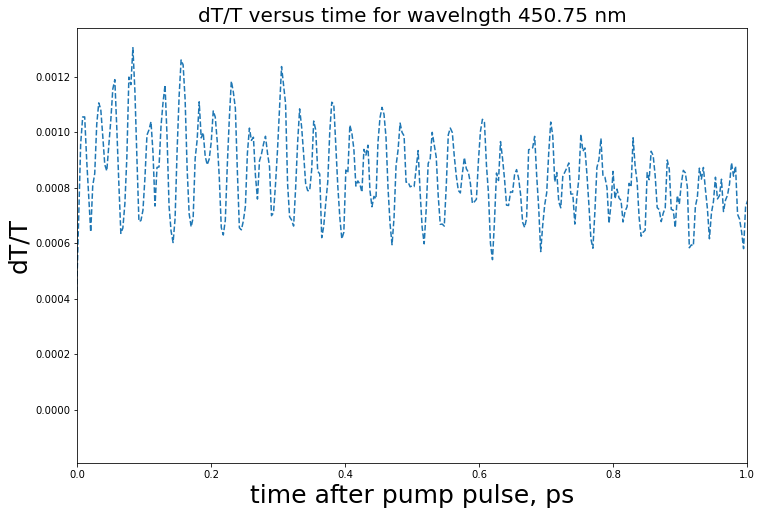

In [115]:
#wavelength[19]
plot(column,array(all_row)[:,19], linestyle ='--', marker = '')
#wavelength = 450.75 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 450.75 nm', fontsize = 20)
xlim(0,1)

In [39]:
wavelength[15]

433.75

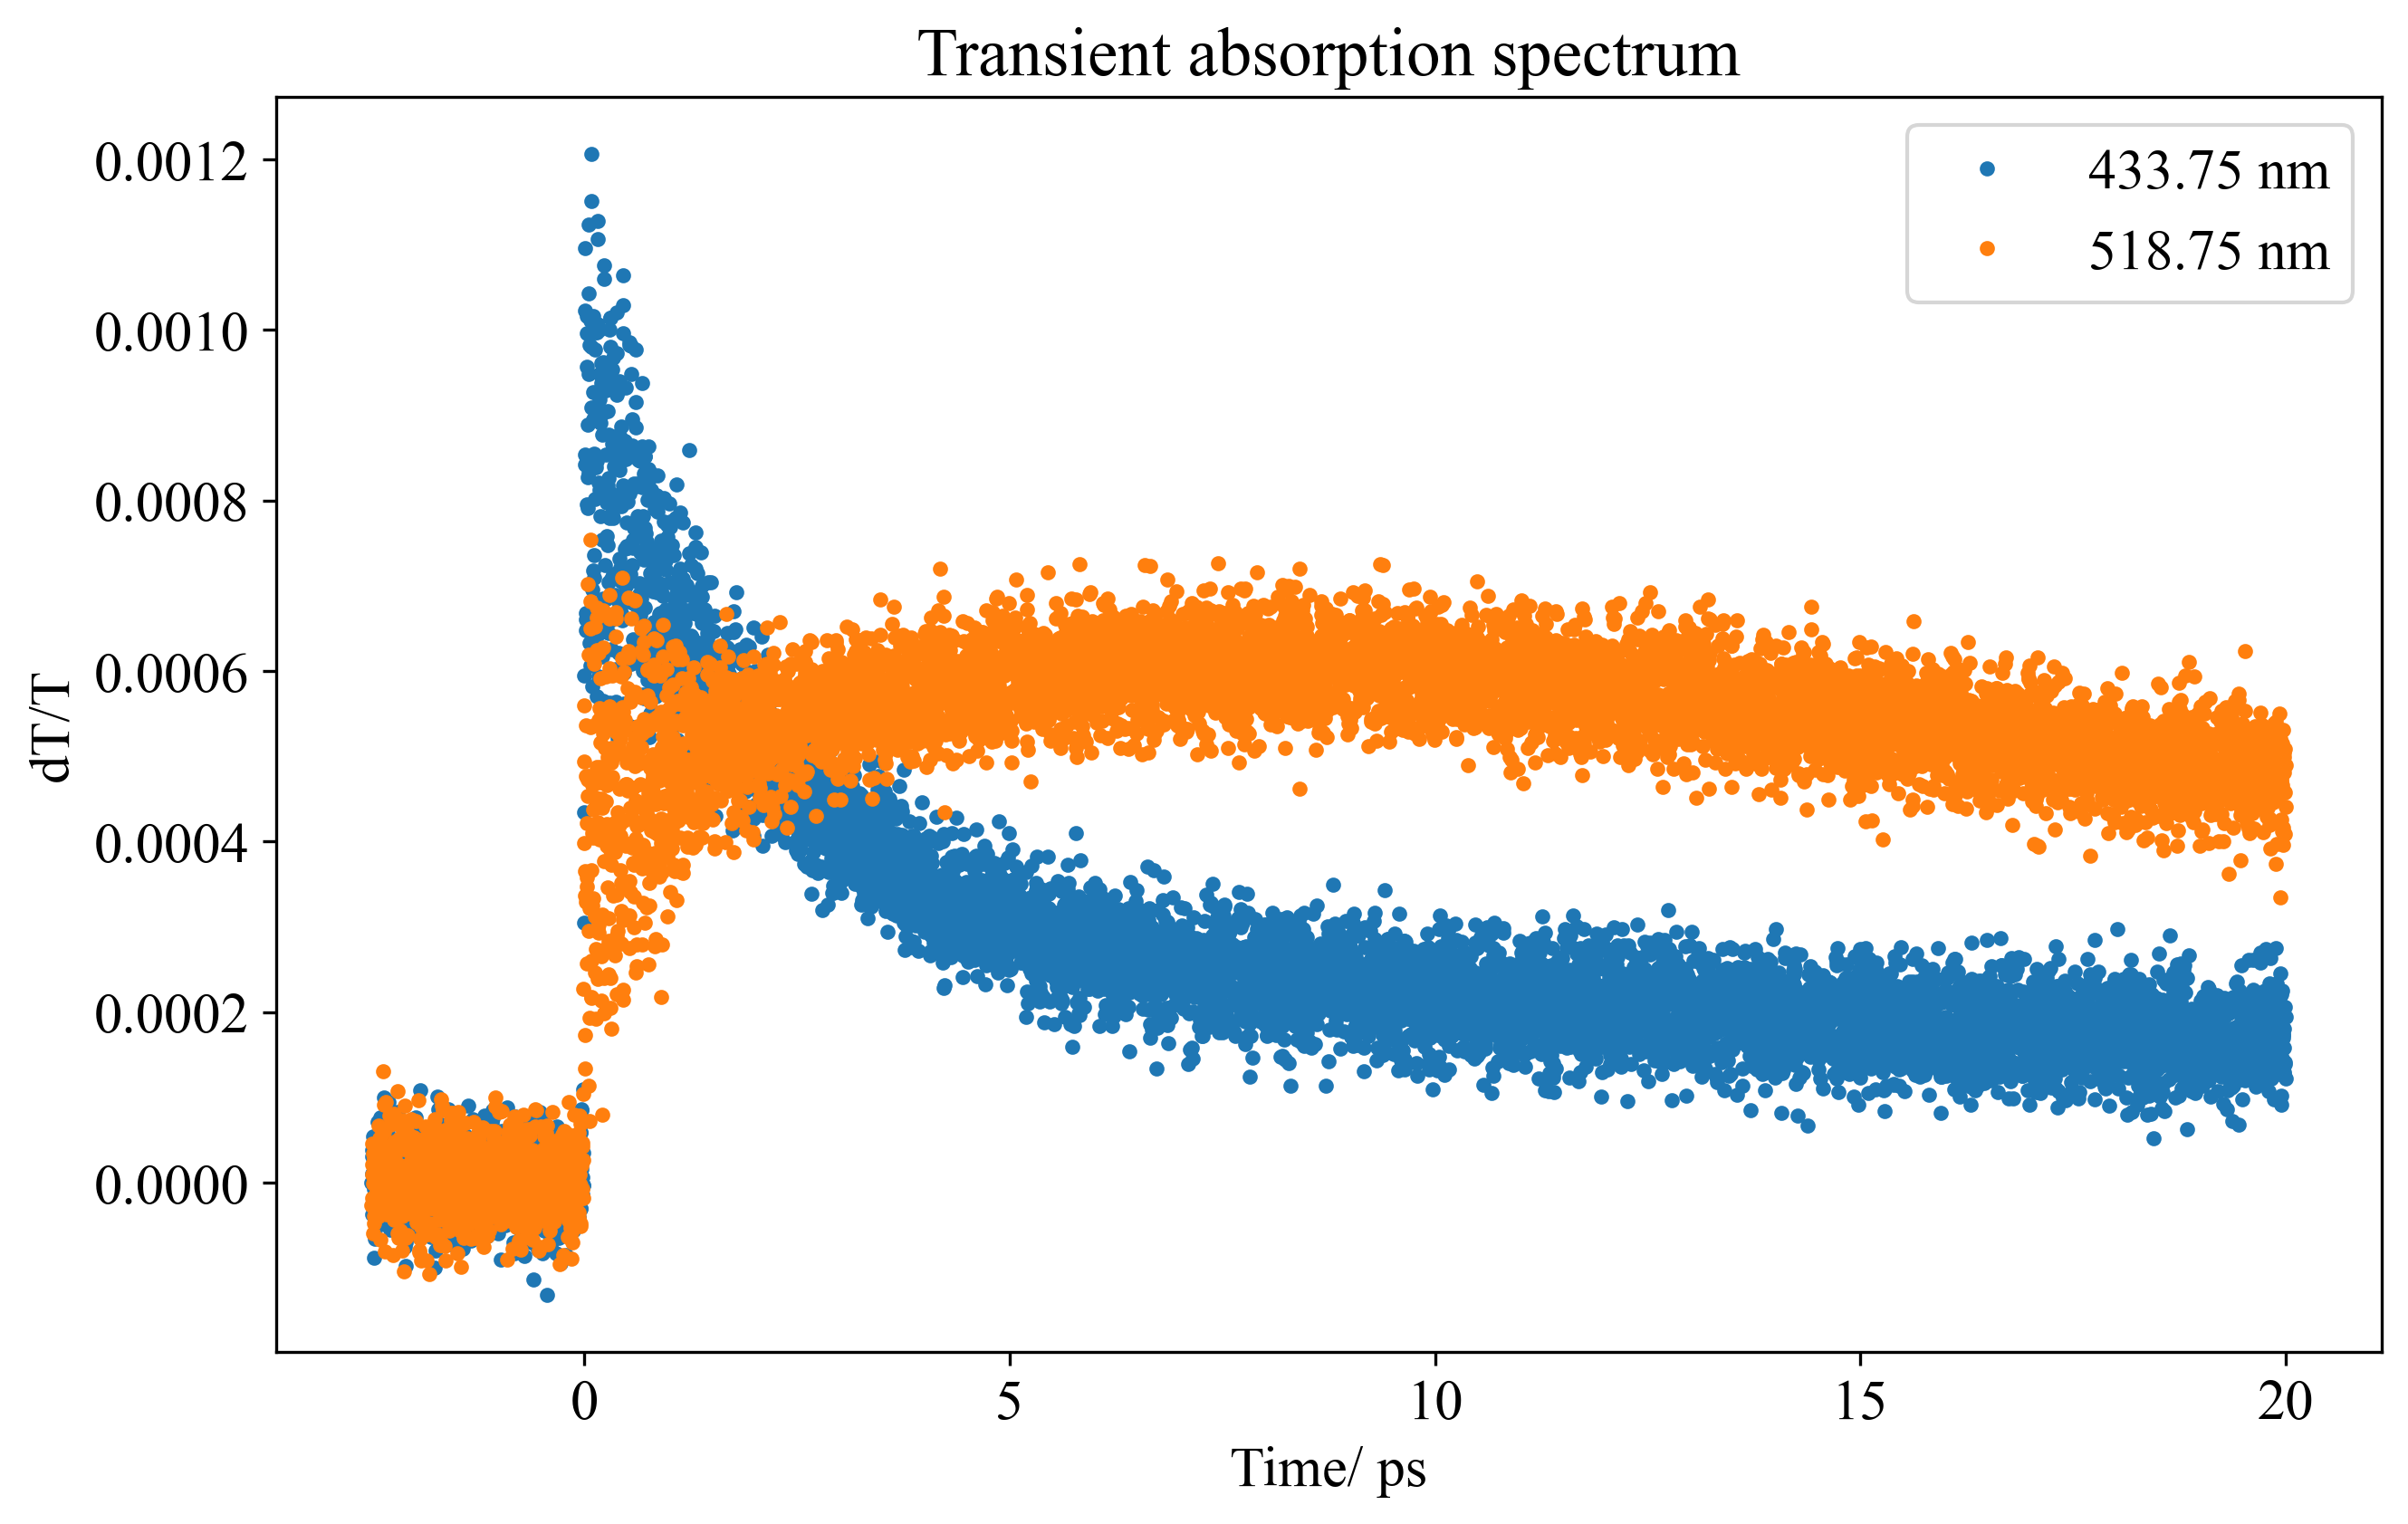

In [40]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})


#wavelength[19]
plot(column,array(all_row)[:,15],label='433.75 nm',marker='.',linestyle='')

plot(column,array(all_row)[:,35],label='518.75 nm',marker='.',linestyle='')


# Add styles for the graph
title('Transient absorption spectrum')

xlabel('Time/ ps')
ylabel('dT/T')

legend()
plt.show()

In [43]:
wavelength[94]

769.5

Text(0.5, 1.0, 'dT/T versus time for wavelngth 769.5 nm')

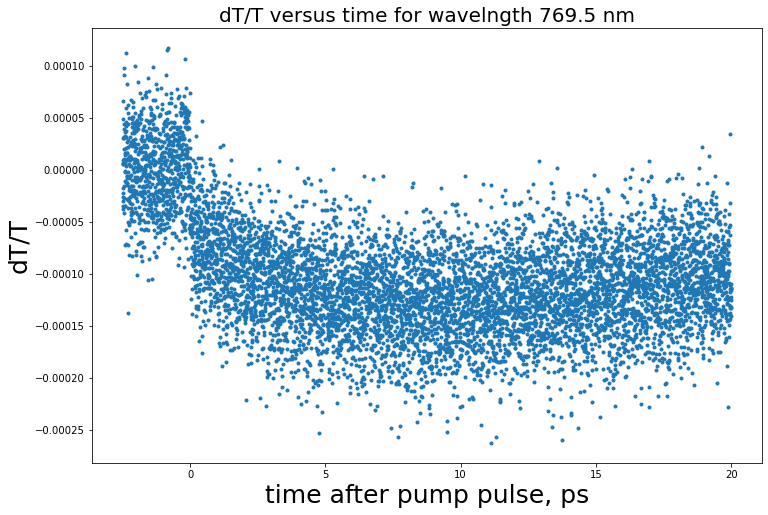

In [44]:
#wavelength[19]
plot(column,array(all_row)[:,94], linestyle ='', marker = '.')
#wavelength = 701.5 nm
xlabel('time after pump pulse, ps', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('dT/T versus time for wavelngth 769.5 nm', fontsize = 20)

In [23]:
plt.rcParams['figure.figsize'] = [12, 8]

In [29]:
column[3500]

[8.0]

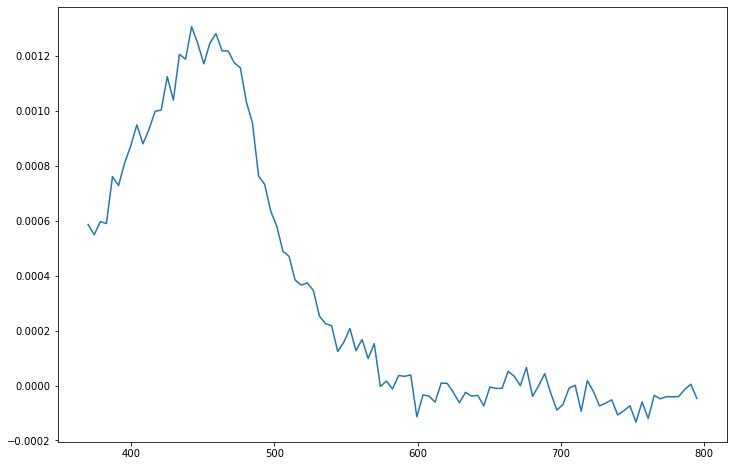

In [24]:
plot(wavelength,all_row[860])
#excitation t = 0.08ps

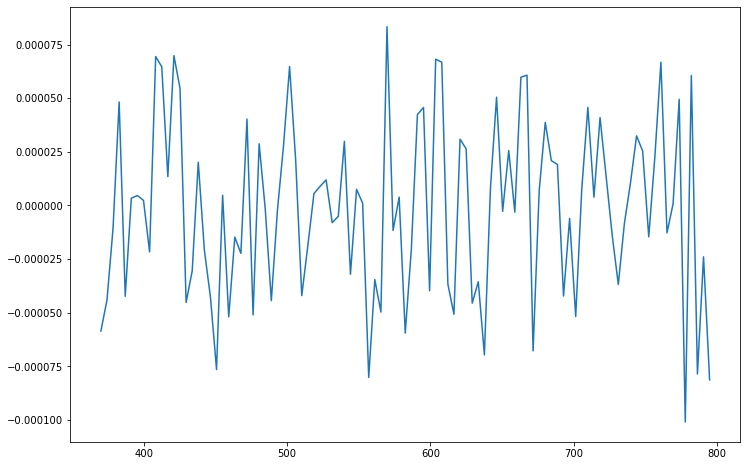

In [25]:
plot(wavelength,all_row[700])
#excitation t = -0.4ps

In [54]:
column[834]

[0.00200000000000022]

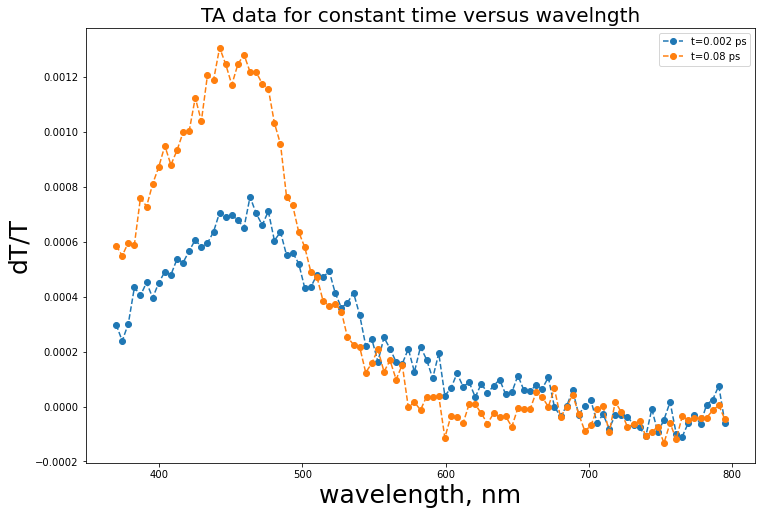

In [56]:
#plot(wavelength, all_row[700], marker = 'o', linestyle = '--', label = 't=-0.4 ps')
plot(wavelength,all_row[834], marker = 'o', linestyle = '--', label = 't=0.002 ps')
plot(wavelength,all_row[860], marker = 'o', linestyle = '--', label = 't=0.08 ps')
#plot(wavelength,all_row[3500], marker = 'o', linestyle = '--', label = 't=8 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()

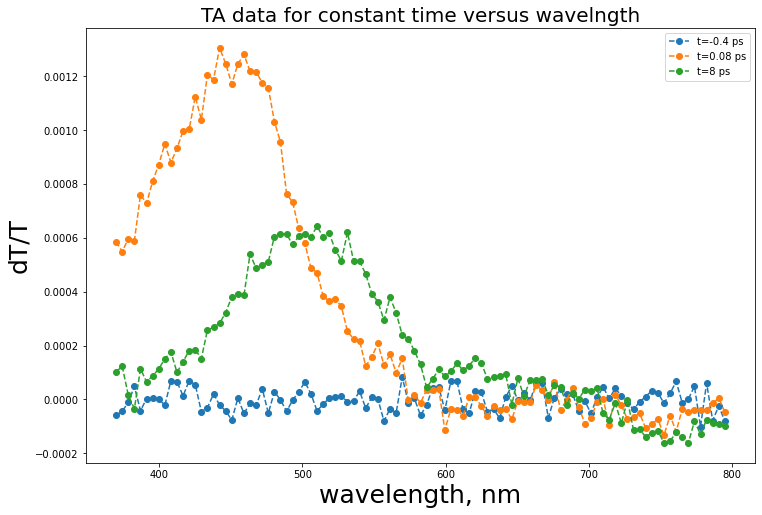

In [36]:
plot(wavelength, all_row[700], marker = 'o', linestyle = '--', label = 't=-0.4 ps')
plot(wavelength,all_row[860], marker = 'o', linestyle = '--', label = 't=0.08 ps')

plot(wavelength,all_row[3500], marker = 'o', linestyle = '--', label = 't=8 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()

In [70]:
column[1100]

[0.8]

(-0.0002, 0.0002)

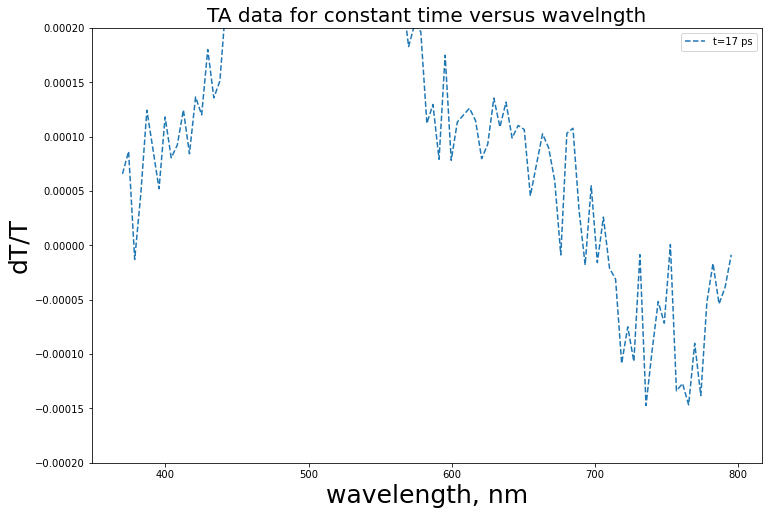

In [134]:
#plot(wavelength,all_row[860], linestyle = '--', label = 't=0.08 ps')
#plot(wavelength,all_row[1100], linestyle = '--', label = 't=0.8 ps')
#plot(wavelength,all_row[1500],  linestyle = '--', label = 't=2 ps')
#plot(wavelength,all_row[3500], linestyle = '--', label = 't=8 ps')
plot(wavelength,all_row[6500], linestyle = '--', label = 't=17 ps')
xlabel('wavelength, nm', fontsize = 25)
ylabel('dT/T', fontsize = 25)
#colorbar.label('dT/T')
title('TA data for constant time versus wavelngth', fontsize = 20)
#excitation t = 8 and 0.08ps
legend()
ylim(-0.0002,0.0002)

In [ ]:
plot(wavelength,all_row[5000])
plot(wavelength,all_row[5000])

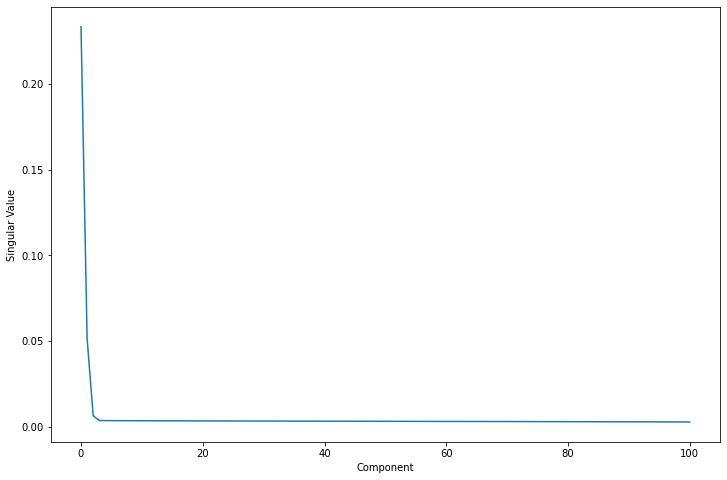

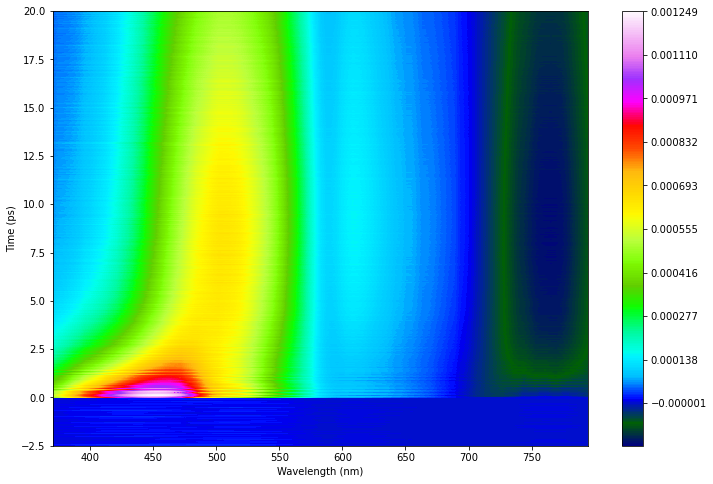

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = all_row

# Center the data
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# Perform SVD
U, s, Vt = np.linalg.svd(all_row)
S = np.diag(s)

# Plot the singular values
plt.plot(s)
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.show()

# Choose a number of components to retain
n_components = 2

# Reconstruct the data using the retained components
U_reduced = U[:, :n_components]
S_reduced = S[:n_components, :n_components]
Vt_reduced = Vt[:n_components, :]
reconstructed_data = U_reduced @ S_reduced @ Vt_reduced
levels = linspace(-0.00013658094550707877,0.0012499329647849937,1000)
# Plot the reconstructed data
#plt.imshow(wavelength,column,reconstructed_data, cmap='jet', aspect='auto')
contourf(x,y,reconstructed_data,levels=levels)
colorbar()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (ps)')
plt.show()

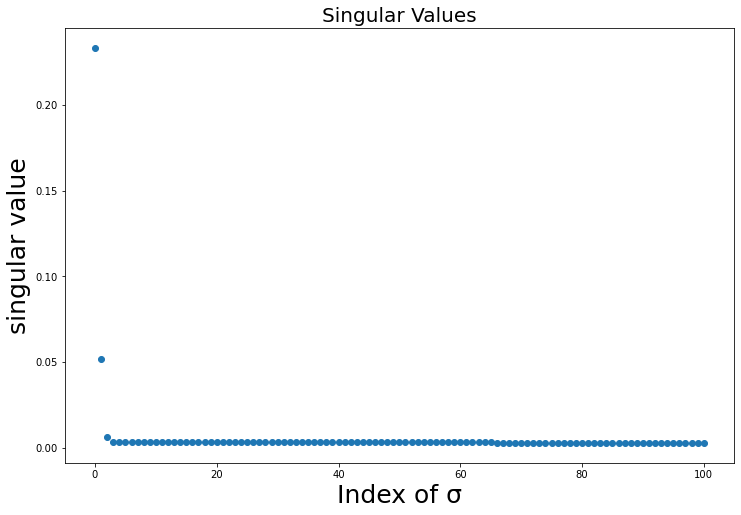

In [103]:
s_nor = s/sum(s)
s_nor = s_nor*100
s_nor
plot(s, marker = 'o', linestyle = '')
title('Singular Values', fontsize = 20)
plt.xlabel('Index of σ', fontsize = 25)
plt.ylabel('singular value', fontsize = 25)
plt.show()

Text(0.5, 0, 'time, ps')

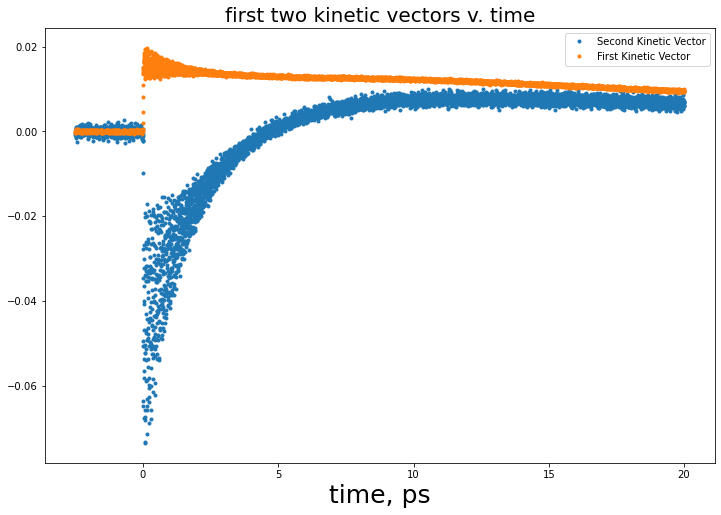

In [83]:
#plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')
plot(column,U_reduced[:,1], marker = '.', linestyle = '',label = 'Second Kinetic Vector')
plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')
legend()
title('first two kinetic vectors v. time', fontsize = 20)

plt.xlabel('time, ps', fontsize = 25)

Text(0.5, 0, 'time, ps')

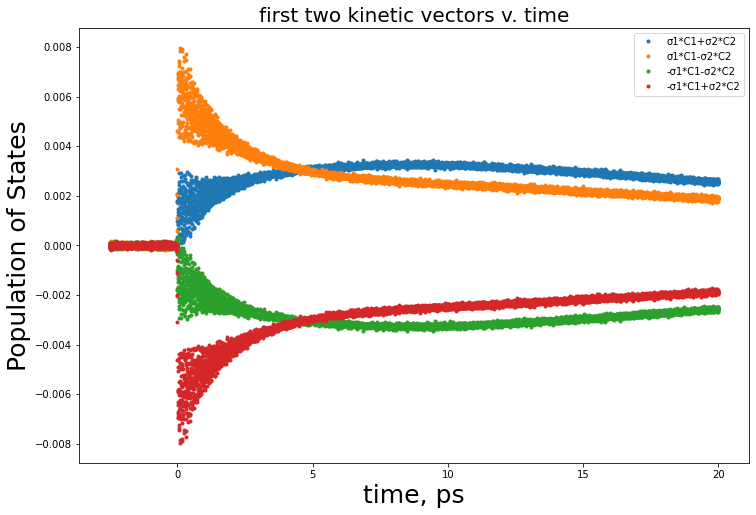

In [95]:
plot(column,s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1+σ2*C2')
plot(column,s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1-σ2*C2')
plot(column,-s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = '-σ1*C1-σ2*C2')
plot(column,-s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = '-σ1*C1+σ2*C2')

#plot(column,U_reduced[:,1], marker = '.', linestyle = '',label = 'Second Kinetic Vector')
#plot(column,U_reduced[:,0], marker = '.', linestyle = '',label = 'First Kinetic Vector')

legend()
title('first two kinetic vectors v. time', fontsize = 20)
plt.ylabel('Population of States', fontsize = 25)
plt.xlabel('time, ps', fontsize = 25)

Text(0.5, 0, 'time, ps')

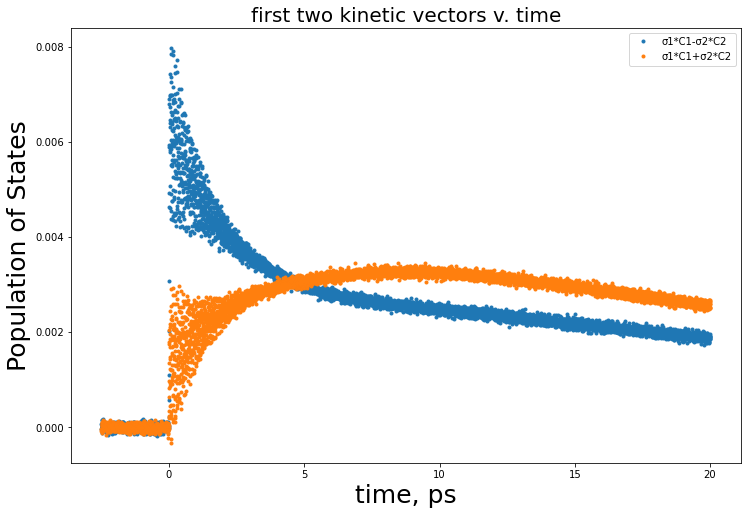

In [98]:
plot(column,s[0]*U_reduced[:,0]-s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1-σ2*C2')
plot(column,s[0]*U_reduced[:,0]+s[1]*U_reduced[:,1], marker = '.', linestyle = '',label = 'σ1*C1+σ2*C2')

#plot(column,-s[0]*U_reduced[:,1]-s[1]*U_reduced[:,0], marker = '.', linestyle = '',label = '-σ1*C1-σ2*C2')
#plot(column,-s[0]*U_reduced[:,0]+s[1]*U_reduced[:,0], marker = '.', linestyle = '',label = '-σ1*C1+σ2*C2')

legend()
title('first two kinetic vectors v. time', fontsize = 20)
plt.ylabel('Population of States', fontsize = 25)
plt.xlabel('time, ps', fontsize = 25)

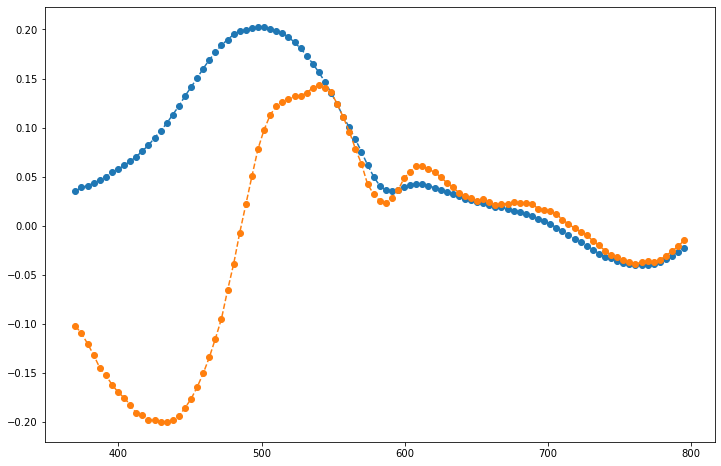

In [99]:
plot(wavelength,Vt[0],marker = 'o', linestyle ='--')
plot(wavelength,Vt[1],marker = 'o', linestyle ='--')


Text(0.5, 0, 'wavelength, nm')

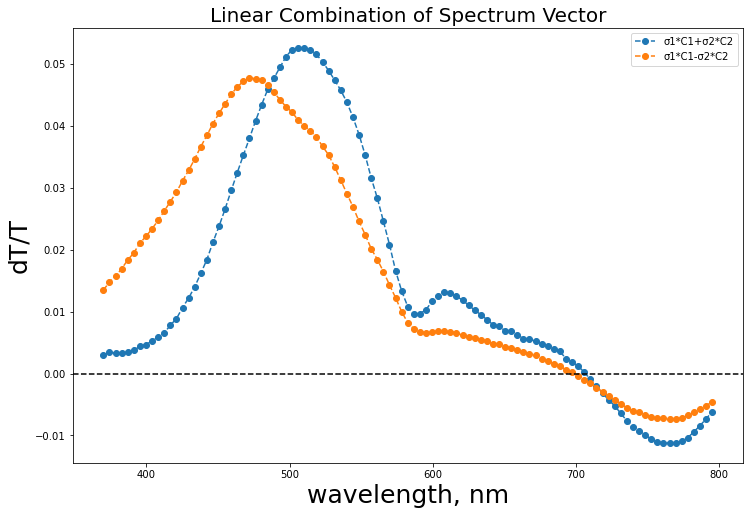

In [110]:
plot(wavelength,s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = 'σ1*C1+σ2*C2')
plot(wavelength,s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = 'σ1*C1-σ2*C2')
#plot(wavelength,-s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1+σ2*C2')
#plot(wavelength,-s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1-σ2*C2')
legend()
axhline(y = 0, color = 'black', linestyle = '--')
title('Linear Combination of Spectrum Vector', fontsize = 20)
plt.ylabel('dT/T', fontsize = 25)
plt.xlabel('wavelength, nm', fontsize = 25)

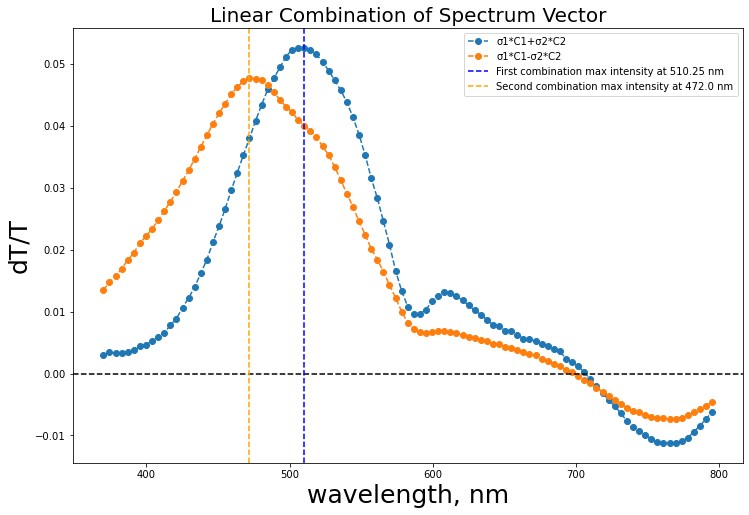

In [128]:
lista = (s[0]*Vt[0]+s[1]*Vt[1]).tolist()
listb = (s[0]*Vt[0]-s[1]*Vt[1]).tolist()
plot(wavelength,lista,marker = 'o', linestyle ='--',label = 'σ1*C1+σ2*C2')
plot(wavelength,listb,marker = 'o', linestyle ='--',label = 'σ1*C1-σ2*C2')
#plot(wavelength,-s[0]*Vt[0]+s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1+σ2*C2')
#plot(wavelength,-s[0]*Vt[0]-s[1]*Vt[1],marker = 'o', linestyle ='--',label = '-σ1*C1-σ2*C2')

axhline(y = 0, color = 'black', linestyle = '--')
title('Linear Combination of Spectrum Vector', fontsize = 20)
plt.ylabel('dT/T', fontsize = 25)
plt.xlabel('wavelength, nm', fontsize = 25)

a = lista.index(max(lista))
#tx2 = 'Second max Emission Absorbance for BV440 is at '+str(round(all_wl[a],2))+ ' nm'
tx = 'First combination max intensity at '+str(wavelength[a])+ ' nm'
axvline(wavelength[a], color = 'blue', linestyle ='--', label = tx)


b = listb.index(max(listb))
tx2 = 'Second combination max intensity at '+str(wavelength[b])+ ' nm'
axvline(wavelength[b], color = 'orange', linestyle ='--', label = tx2)

legend()

(0.0, 1.0)

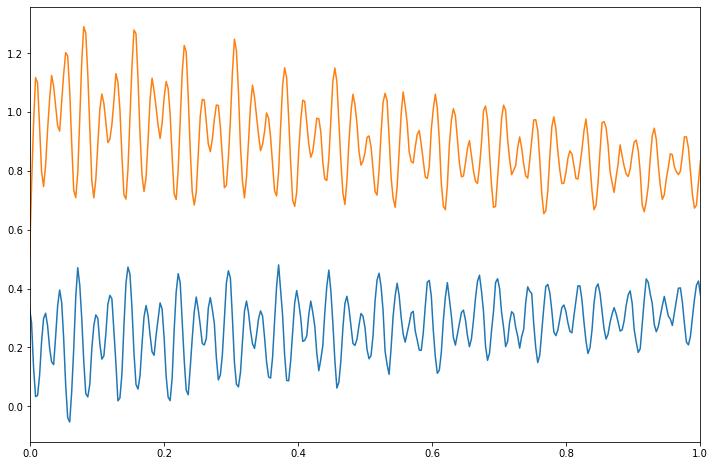

In [112]:
plot(column,37.74082104*U[:,0]+8.36303833*U[:,1])
plot(column,37.74082104*U[:,0]-8.36303833*U[:,1])
xlim(0, 1)

In [ ]:
time = column
intensity = data[:, 1]

# Perform Fourier transform on the intensity data
fft = np.fft.fft(intensity)

# Calculate the frequencies corresponding to the Fourier transform
freq = np.fft.fftfreq(len(intensity), time[1]-time[0])

# Plot the FTIR spectrum
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.show()